In [4]:
!pip install annoy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [222]:
import pandas as pd
data = pd.read_csv('spotusers.csv')

# On renomme les colonnes
data = data.rename(columns={'663821': 'user_id', 's948047': 'film_id'})

data

,user_id,film_id
0,663821,s34945401
1,663821,s84097505
2,663821,s79213851
3,663821,s87544655
4,663821,s125969381
...,...,...
999994,869730711,s72411360
999995,869730711,s2203428
999996,869730711,s113415198
999997,869730711,s8011849


In [224]:
# On enleve les 's' dans la colonne film_id et on transforme tous ses elements en float
data['film_id'] = data['film_id'].str.replace('s', '', regex=False)
data = data.astype(float)
data.head()

,user_id,film_id
0,663821.0,34945401.0
1,663821.0,84097505.0
2,663821.0,79213851.0
3,663821.0,87544655.0
4,663821.0,125969381.0


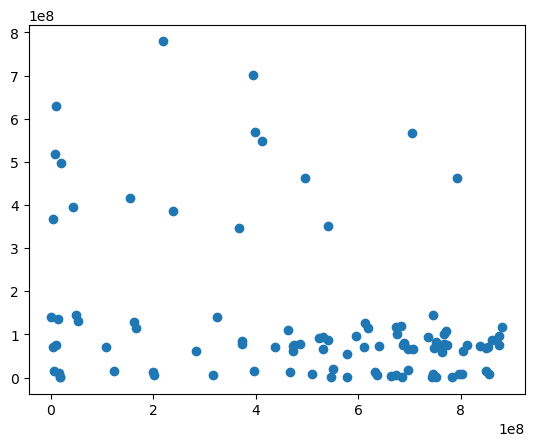

In [225]:
# Représentation graphique (juste pour visualiser)
import matplotlib.pyplot as plt

plot = data.sample(n=100, random_state=42)  # Exemple : 10 000 points
plt.scatter(y=plot['film_id'],x=plot['user_id'])
plt.show()

In [227]:
def Annoy(id, k):
    f = 40  # Longueur du vecteur
    t = AnnoyIndex(f, 'angular')  # Créer l'index avec le type 'angular' et la longueur du vecteur

    # Grouper par 'user_id' et appliquer une liste sur 'film_id'
    listes = data.groupby('user_id')['film_id'].apply(list)
    
    i = 0
    # Créer une liste où chaque élément contient user_id + films associés
    for user_id, films in listes.items():
        # Un vecteur est composé d'un user et de tous ses films
        vector = [user_id] + films
        
        # Si le vecteur est plus court que 40, le compléter avec des zéros
        if len(vector) < 40:
            vector.extend([0] * (40 - len(vector)))  # Compléter avec des zéros
        # Si le vecteur est plus long que 40, le couper à 40 éléments
        elif len(vector) > 40:
            vector = vector[:40]

        # Ajouter l'élément à l'index
        t.add_item(i, vector)
        i += 1

    # Construire l'index avec 10 arbres (plus de trees = meilleure précision)
    t.build(10)  
    # Recherche des k voisins les plus proches de l'élément 'id'
    print(t.get_nns_by_item(id, k+1, include_distances=True))  # Trouver les k plus proches voisins

# Appeler la fonction pour tester
Annoy(2, 3)

([2, 283, 974, 1433], [0.0, 0.7765908241271973, 0.7869450449943542, 0.8031201958656311])


In [230]:
listes = data.groupby('user_id')['film_id'].apply(list)
print(listes.iloc[283][0],
listes.iloc[974][0],
listes.iloc[1433][0])

84942183.0 127775773.0 355665151.0


In [220]:
# Remarque : il faut aussi vérifier que les films recommandés n'ont pas déjà été vus par notre utilisateur.